In [101]:
"""
Erick Serrano
PHYS300
11/02/2020

Homework:
1. From Web
- Download data from http://www-personal.umich.edu/~mejn/cp/data/circular.txt
2. Use fourier transform to process the image and figure out how to compress the data
3. Compare it with the size you obtained via plt.savefig()
"""


#Code Snippet to download file taken from Lecture 4 Quiz

import urllib.request
import matplotlib.pyplot as plt
import numpy as np

# 1) Download Data


In [102]:

req = urllib.request.urlopen('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
the_page = req.read().decode('utf-8')


In [103]:
#Converting string of numbers to list of floats
print(type(the_page))

image = np.empty(0)

for data in the_page.split():
    try:
        data = float(data)
        image = np.append(image, data)
    except ValueError:
        print("Error: ",data)
        
print(image.shape)

<class 'str'>
(251001,)


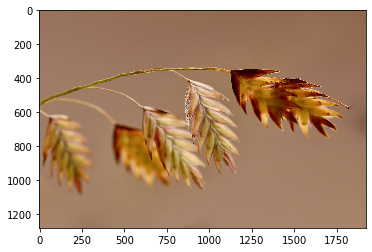

(1280, 1920, 3)


In [105]:
#Another example with a clearer compression difference
oats = plt.imread('north-sea-oats-5706656_1920.jpg',2)
plt.imshow(oats)
plt.show()

print(oats.shape)

(501, 501)


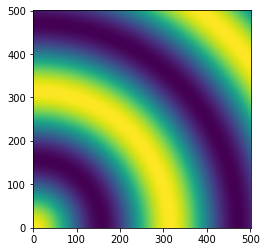

In [106]:
#Reshape and display as an image! 
#Hardcoded dimensions taken from output in above cell
#image_data = image
image = np.reshape(image, (501, 501))
print(image.shape)
plt.imshow(image, origin = 'lower')
plt.savefig("Regularimage.jpg")
plt.show()

# 2) Use Fourier Transform to process & compress image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


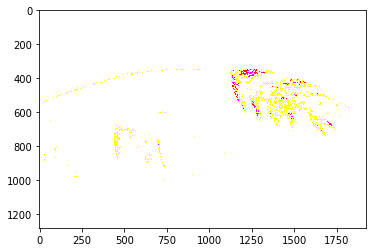

In [112]:
#List of images
c_1 = np.fft.fft2(image)
y_1 = np.fft.ifft2(c_1).real
y_1 = y_1.reshape((501, 501))



#Example with clear compression difference
c_oats = np.fft.fft2(oats)
y_oats = np.fft.ifft2(c_oats).real
y_oats = y_oats.reshape((oats.shape[0], oats.shape[1], oats.shape[2]))

plt.imshow(y_oats)
plt.savefig('compressedOats.jpg')
plt.show()

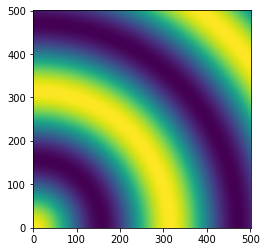

In [113]:
plt.imshow(y_1, origin = "lower")
plt.savefig('compressedimage.jpg')
plt.show()

# Compare it with the size of original

Unlike the Oats example we used to reaffirm the efficacy of the FFT function, the circle image was not compressed in size at all. This could be attributed to the small size of the file ($18.5$kb). On the other hand, the oats image was HD quality, and was significantly reduced (to $18.9$kb) 